# Lab 1 Evaluation

Names, Surnames, and Group :<br>
**BACCAR Rostom 4IR C1**<br>
**CHAUZY Célia 4IR C1**<br>
**YAKHELEF Morgan 4IR C1**

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

***The likelyhood of providing different topologies and caracteristics depends on the parameters we use to build the trees. These parameters are splitter, max_depth and min_samples_split.
The splitter, which takes only two values (best or random), determines how the split at each note is going to be: either it's the best split or the best random split
The max_depth parameter determines how deep our tree is going to be, that is its height. The deeper the tree is the more complex and accurate the model is but the more likely it's going to end up overfitting so there is a certain balance to hit.
The min_samples_split parameter determines the minimum number of samples required to do a split at a node. The greater this number is, the more complex the model is but there is also a risk of overfitting***<br>

***Here are the 6 configurations that we propose:***<br>
<span style="color:red">
split=best, max_depth=5, min_samples_split=100<br>
split=best, max_depth=10, min_samples_split=100<br>
split=best, max_depth=5, min_samples_split=500<br>
split=random, max_depth=5, min_samples_split=100<br>
split=random, max_depth=20, min_samples_split=50<br>
split=random, max_depth=5, min_samples_split=1000<br>
</span>

Train a decision tree for each of the previous configurations on the full dataset

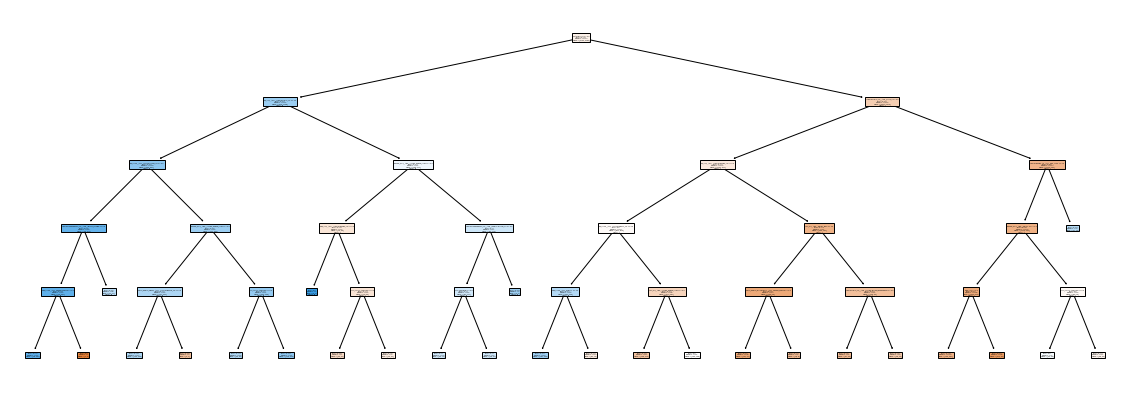

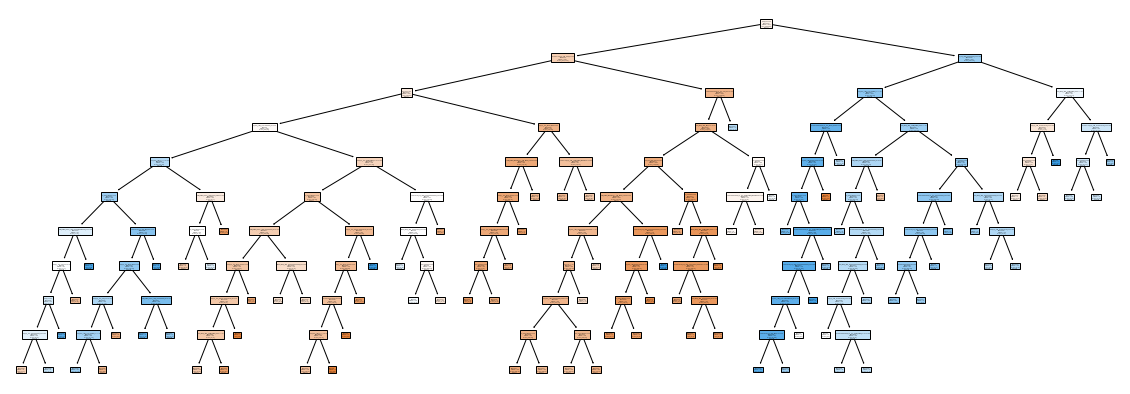

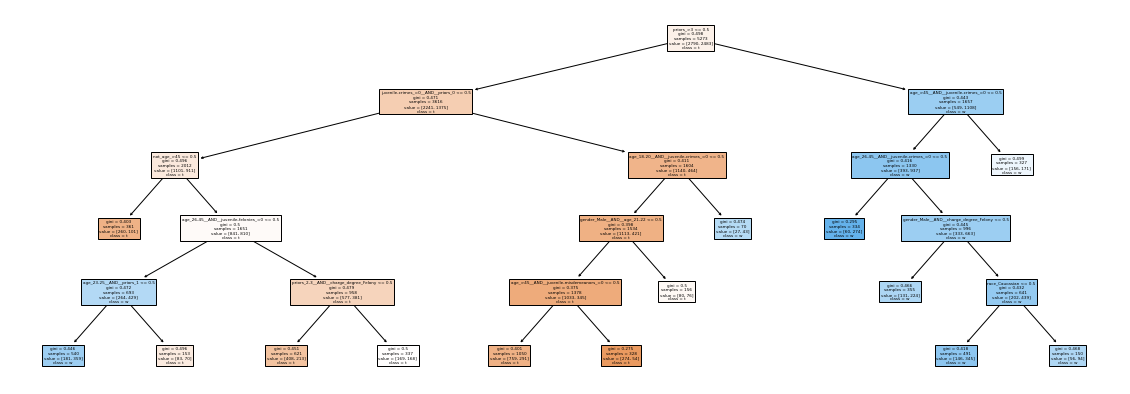

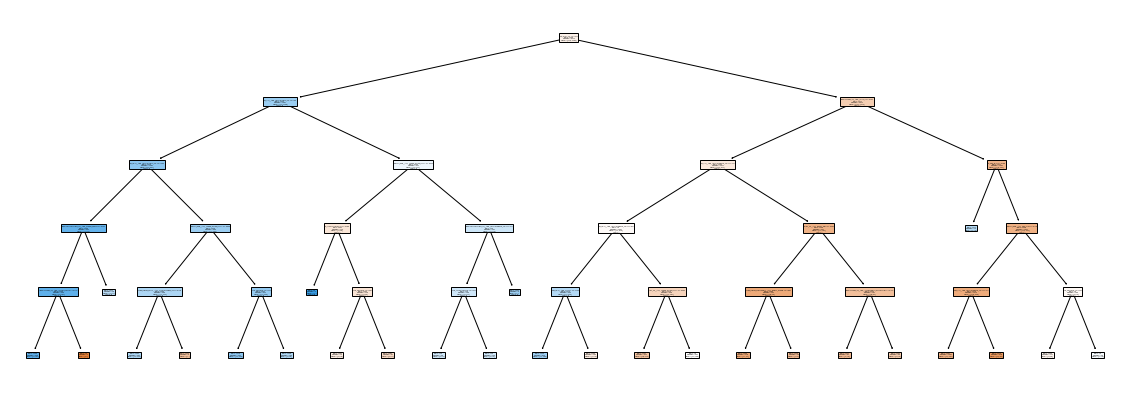

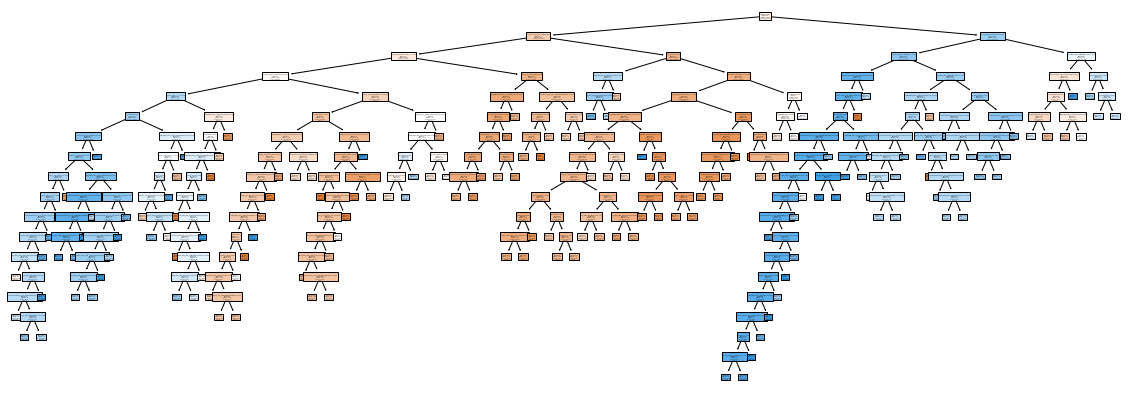

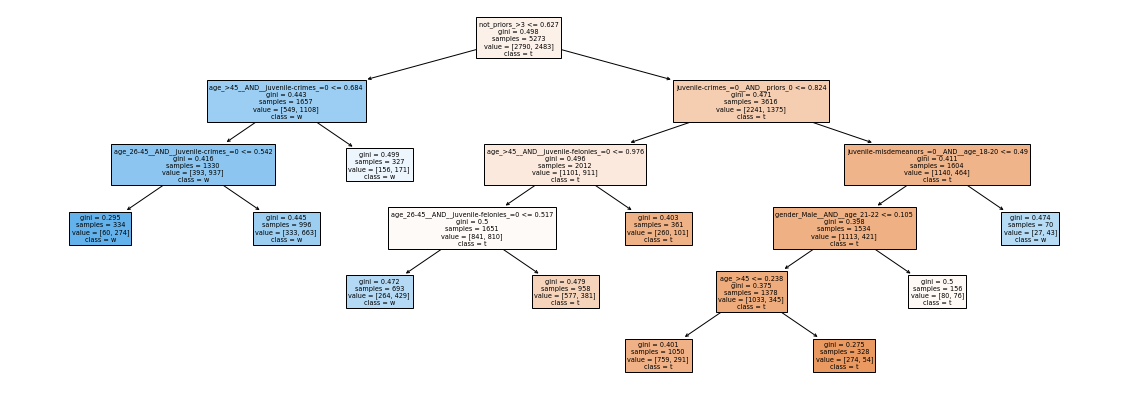

In [2]:
#Imports
from sklearn import tree
from matplotlib import pyplot as plt
import csv
import numpy as np
from utils import load_from_csv

#Trees construction
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
trees_config=[["best",5,100],["best",10,100],["best",5,500],["random",5,100],["random",20,50],["random",5,1000]]
for t in trees_config:
    clf = tree.DecisionTreeClassifier(splitter=t[0],max_depth=t[1],min_samples_split=t[2])
    clf = clf.fit(train_examples, train_labels)
    fig = plt.figure(figsize=(20,7))
    _ = tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= (prediction), 
                       filled=True)

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

***The k-fold cross validation alrorithm is a great way to train the tree. It makes sure that the training is not biased towards a certain split and it helps us make the best out of our data in terms of training. The idea is to perform the training k times (in this case 5 times) by splitting the data into k folds each time. 
We will choose two different trees in terms of topologies and characteristics. For each tree, we will use the k-fold cross validation algorithm to train it. We will then evaluate the training of each tree by measuring the score of its training set and its testing set.
Note: the training is done a certain number of times for each tree to make sure the final score is relevant***

***Tree model for the following bits code:<br>
<span style="color:blue">
Tree=[ splitter, max_depth, min_samples_split, nbr_kfold_splits, nbr_trainings ]
</span>***

In [87]:
#Function taking a tree + parameters as input, returns train & test score of the tree
def evaluation (t):
    train_sum=0
    test_sum=0
    num_splits=t[3]
    kf = KFold(n_splits=num_splits)
    for i in range(0,t[4]):
        clf = tree.DecisionTreeClassifier(splitter=t[0],max_depth=t[1],min_samples_split=t[2])
        for train_index, test_index in kf.split(train_examples):
            x_train, x_test = train_examples[train_index], train_examples[test_index]
            y_train, y_test = train_labels[train_index], train_labels[test_index]
            clf = clf.fit(x_train, y_train)
            train_sum+=clf.score(x_train, y_train)
            test_sum+=clf.score(x_test, y_test)
    train_score=train_sum/(trainings*num_splits)
    test_score=test_sum/(trainings*num_splits)
    return [train_score,test_score]

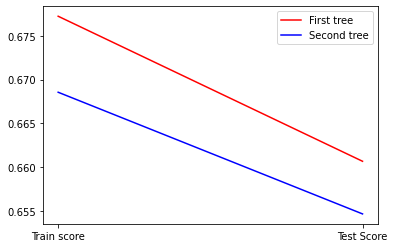

In [77]:
#Training & Evaluation
from sklearn.model_selection import KFold
trees_config=[["best",5,100,5,100],["random",5,1000,5,100]]
scores=[]


for t in trees_config:
    scores.append(evaluation(t))

#Score visualisation
score_types=["Train score","Test Score"]
plt.plot(score_types,scores[0],'red',label='First tree')
plt.plot(score_types,scores[1],'blue',label='Second tree')
plt.legend()
plt.show()

Propose an experimental study that shows the transition phase from underfitting to overfitting 

***One way to visualize the transition phase from underfitting to overfitting is to see the influence of different parameters on trees. We studied 3 parameters in the beginning: splitter, max_depth and min_samples_split. We now have a 4th parameter which is the number of splits when using the k-fold cross validation algorithm to train the trees.
The idea is to plot the train and test score of the tree according to those parameters to see how the score is impacted.
Note: the way of splitting won't be part of the study as it is not very impactful score-wise.***

In [78]:
#Function that helps visualize tree scores according to a certain parameter
def score_plot(x_axis,scores,x_axis_label,title):
    plt.title(title)
    plt.plot(x_axis,extract0(scores),'red',label='Train score')
    plt.plot(x_axis,extract1(scores),'blue',label='Test score')
    plt.xlabel(x_axis_label)
    plt.ylabel('Score')
    plt.legend()
    plt.show()
    
#Function extracting all first/second elements of a list of lists
def extract0(lst):
    return [item[0] for item in lst]

def extract1(lst):
    return [item[1] for item in lst]

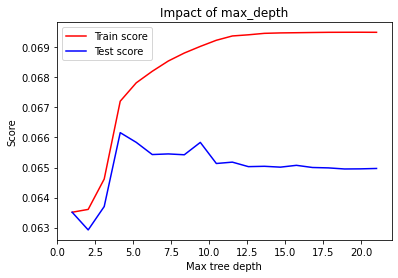

In [79]:
#Studying impact of max_depth
max_depth=20
scores=[]
for i in range (1,max_depth+1):
    t=["best",i,10,5,10]
    scores.append(evaluation(t))
x_depth=np.linspace(1,max_depth+1,max_depth)
score_plot(x_depth,scores,'Max tree depth',"Impact of max_depth") 

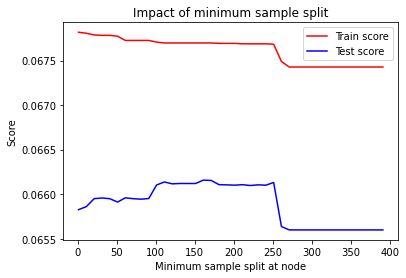

In [80]:
#Studying impact of min_samples_split
max_samples=400
scores=[]
for i in range (2,max_samples+1,10):
    t=["best",5,i,5,10]
    scores.append(evaluation(t))
x_samples=np.arange(1,max_samples,10)
score_plot(x_samples,scores,'Minimum sample split at node',"Impact of minimum sample split")  

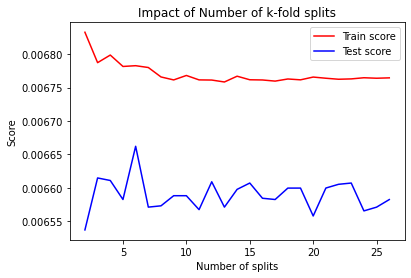

In [92]:
#Studying impact of number of k-fold splits
max_splits=25
scores=[]
for i in range (2,max_splits+2):
    t=["best",5,5,i,1]
    scores.append(evaluation(t))
    x_splits=np.arange(2,max_splits+2)
    
score_plot(x_splits,scores,'Number of splits',"Impact of Number of k-fold splits")    


*** As the graphs crearly show, there is a certain balance to hot when it comes to dealing with the three parameters that were studied. 
The underfitting phase is recognizable by its low score and corresponds to the first part of the graph.
The best fit phase is recognizable by its peak of score (middle of graph)
The overfitting phase is recognizable by its "lower than the peak" score. At this point, the testing score continues to decrease as the value of the parameter increases as the model takes into account even more noise than before. The training score either increases or stays constant. Both score eventually stabilize.***<br>
<span style="color:purple">
***Note: The phases of the "Impact of minimum sample split" graph are reversed since the less samples we have the more complex the model is ***
</span>


Construct the confusion matrix on a particular good configuration (after explaining your choice)

***A good confusion matrix gives us a more detailed evaluation compared to the scores we studied earlier. In our case, we have a binarized dataset. So the confusion matrix is going to be a 2*2 matrix as we have two kinds of outputs: true or false.
The purpose is to see where the prediction failed or succeeded the most: either the "true" cases are better predicted than the "false" cases or the other way around. That way, instead of having an average score of the prediction, we know where the potential problem is if we want to improve the model.
The key to choosing a goof configuration to create a confusion matrix is to create a bias that makes the tree predict one outcome better than the other. Unfortunately, the dataset is too big to alter the data and create the bias manually.
However, we can create this bias by altering certain parameters
The following bits of code show the impact of these different parameters on the creation of the bias, the bias being a significant different between the true positives and the true negatives.***

***Tree model for the following bits code:<br>
<span style="color:blue">
Tree=[ max_depth, min_samples_split, test_size, random_state ]
</span>***

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def confusion_matrix_gap(max_depth,min_samples_split,test_size,random_state):
    clf = tree.DecisionTreeClassifier(splitter='best',max_depth=max_depth,min_samples_split=min_samples_split)
    clf = clf.fit(train_examples, train_labels)
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=test_size, random_state=random_state)
    #print(clf.score(x_train, y_train))
    #print(clf.score(x_test, y_test))
    y_pred = clf.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    #print(cf_matrix)
    true_positives=100*cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1])
    true_negatives=100*cf_matrix[1][1]/(cf_matrix[1][0]+cf_matrix[1][1])
    #print("True positives: ",true_positives,'%')
    #print("True negatives: ",true_negatives,'%')
    gap=abs(true_positives-true_negatives)
    #print(gap)
    return gap



In [148]:
#Function that helps visualize gap according to a certain parameter
def gap_plot(title,x_axis,xlabel,gap):
    plt.title(title)
    plt.plot(x_axis,gap,'red')
    plt.xlabel(xlabel)
    plt.ylabel('Gap')
    plt.show()

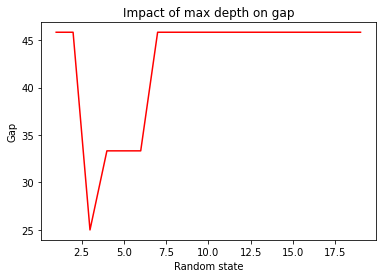

In [141]:
#Impact of max depth on gap
gap=[]
x_depth=[]
for i in range(1,20):
    gap.append(confusion_matrix_gap(i+1,50,20,30))
    x_depth.append(i)
   
gap_plot('Impact of max depth on gap',x_depth,'max depth',gap)

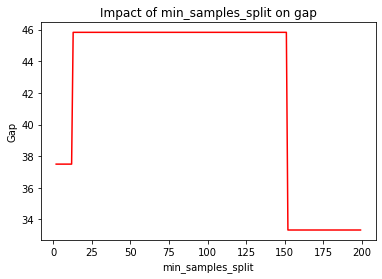

In [144]:
#Impact of min_samples_split on gap
gap=[]
x_samples=[]
for i in range(2,200):
    gap.append(confusion_matrix_gap(10,i,20,30))
    x_samples.append(i)
   
gap_plot('Impact of min_samples_split on gap',x_samples,'min_samples_split',gap)

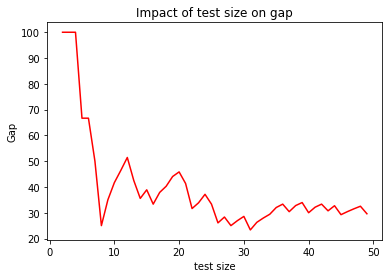

In [146]:
#Impact of test size on gap
gap=[]
x_size=[]
for i in range(2,50):
    gap.append(confusion_matrix_gap(10,100,i,30))
    x_size.append(i)
   
gap_plot('Impact of test size on gap',x_size,'test size',gap)

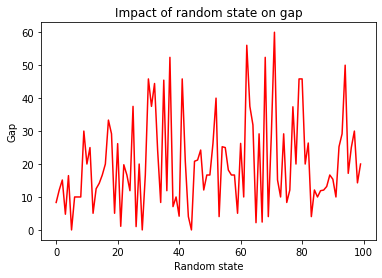

In [147]:
#Impact of random state on gap
gap=[]
x_gap=[]
for i in range(0,100):
    gap.append(confusion_matrix_gap(10,50,20,i))
    x_gap.append(i)
   
gap_plot('Impact of random state on gap',x_gap,'Random state',gap)

The three first graphs give us conclusive results: the gap is significant for a certain value of the parameter. The last graph is inconclusive. To create the biggest gap possible, we are going to combine the 3 values of the parameters that show the greatest gap. We will then print the confusion matrix.

In [149]:
    clf = tree.DecisionTreeClassifier(splitter='best',max_depth=10,min_samples_split=100)
    clf = clf.fit(train_examples, train_labels)
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=3, random_state=30)
    y_pred = clf.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    true_positives=100*cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1])
    true_negatives=100*cf_matrix[1][1]/(cf_matrix[1][0]+cf_matrix[1][1])
    print("True positives: ",true_positives,'%')
    print("True negatives: ",true_negatives,'%')
    gap=abs(true_positives-true_negatives)
    print("Gap: ",gap)

[[2 0]
 [1 0]]
True positives:  100.0 %
True negatives:  0.0 %
Gap:  100.0


Provide an evaluation of the fairness of the model based on the False Positive Rate